

[0.788546255506608, 0.788546255506608, 0.8193832599118943, 0.7973568281938326, 0.8061674008810573, 0.8414096916299559]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[<matplotlib.lines.Line2D object at 0x00000168FA22EEE0>, <matplotlib.lines.Line2D object at 0x00000168FA22EBE0>]


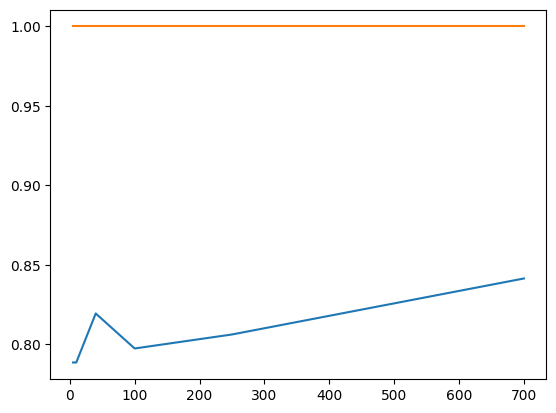

In [7]:
from matplotlib import pyplot as plt
from scipy.io.arff import loadarff
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd
import seaborn as sns


# Reading the ARFF file
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

# Split in data and targets
X = df.drop('class', axis=1)
y = df['class']

labels = list(set(y))

# Split data in test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1, stratify=y)

# Feature selection

result_test = []
result_train = [] 

for e in [5,10,40,100,250,700]:
    selector = SelectKBest(mutual_info_classif, k=e)
    SelectKBest(mutual_info_classif,)
    selector.fit_transform(X_train, y_train)
    cols_indexes = selector.get_support(indices=True)
    selected_columns = X.iloc[:,cols_indexes].columns.tolist()

    # Reduce training and testing sets
    X_train_reduced = X_train[selected_columns]
    X_test_reduced = X_test[selected_columns]

    # Create and train the classifier
    classifier = tree.DecisionTreeClassifier()
    classifier = classifier.fit(X_train_reduced, y_train)

    # Test classifier and compute scores
    y_predicted = classifier.predict(X_test_reduced)

    accuracy = classifier.score(X_test_reduced, y_test)
    train_accuracy = classifier.score(X_train_reduced, y_train) 
    
    result_test.append(accuracy)
    result_train.append(train_accuracy)

print("\n")
print(result_test)
print(result_train)

print(plt.plot([5,10,40,100,250,700],result_test,[5,10,40,100,250,700],result_train))